1.0116491582165972
0.532002818595434
0.29138245847084626
0.17065808123533063
0.11007383207494846
0.07965604951031181
0.06436988234253914
0.056673817760985616
0.05278501711630942
0.05080600055648399
0.04978498813386493
0.049244564945059736
0.04894525858222674
0.04876694908964479
0.04864938395063606
0.04856234028096421
0.048490658122823285
0.04842673311389239
0.048366750794478476
0.048308797728126365
0.04825191403577793
0.04819561814492969
0.04813966840281948
0.04808394350110288
0.048028382496622155
0.0479729547256973
0.04791764471307264
0.047862444602211694
0.04780735035831748
0.04775235986375911
0.04769747196273355
0.04764268598206545
0.04758800149083925
0.04753341817982991
0.04747893580102409
0.047424554137284546
0.04737027298713298
0.04731609215711611
0.04726201145797742
0.04720803070273559
0.047154149705720606
0.047100368282090355
0.04704668624758702
0.04699310341841532
0.04693961961118074
0.04688623464285846
0.04683294833077706
0.04677976049261081
0.04672667094637428
0.046673679510

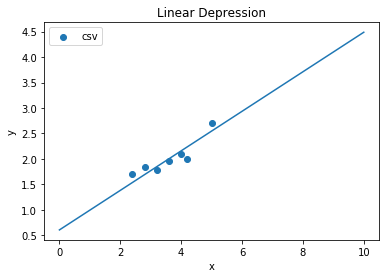

number of iteration:  1503
final formula: y= 0.38816146549816205 *x+ 0.6063046945846758


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random


def mse(m,b,cso):
    'Means square error'
    res = 0
    for i in cso:
        res = res +((i[1]-((m*i[0])+b))*(i[1]-((m*i[0])+b)))
    return res/len(cso)
def jm(m,b,cso,lr):
    'Gradient descent for slope'
    res = 0
    for i in cso:
        res = res +((i[1]-((m*i[0])+b))*i[0]*(-2))
    return (res/len(cso))*lr
def jb(m,b,cso,lr):
    'Gradient descent for bias'
    res = 0
    for i in cso:
        res = res +((i[1]-((m*i[0])+b))*(-2))
    return (res/len(cso))*lr
results = []
with open("./datasets/idk.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)
        
slope = random.uniform(0, 1)
b = random.uniform(0, 1)
lr = 0.01
maxerr = 0.02
iteration = 0
fail = 0

while True:
    fail = mse(slope,b,results)
    print(fail)
    iteration+=1
    if fail<maxerr:
        break
    else:
        slopet = slope
        bt = b
        slope = slopet - jm(slopet,bt,results,lr)
        b = bt - jb(slopet,bt,results,lr)

print(fail)

f = lambda x: slope*x + b

df = pd.read_csv('./datasets/idk.csv', delimiter=',', names=['x', 'y'])
plt.scatter(df['x'], df['y'], label='csv')
#x=np.array([2,5])
x = np.linspace(0, 10, 1000)
plt.plot(x, f(x))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Depression')
plt.legend()
plt.show()
print('number of iteration: ',iteration)
print('final formula: y=',slope,'*x+',b)


In [ ]:
'''
fail = mse(slope,b,results)
print(fail)
slopet = slope
bt = b
slope = slopet - jm(slopet,bt,results,lr)
b = bt - jb(slopet,bt,results,lr)
print(slope)
print(b)
print('---')

fail = mse(slope,b,results)
print(fail)
slopet = slope
bt = b
slope = slopet - jm(slopet,bt,results,lr)
b = bt - jb(slopet,bt,results,lr)
print(slope)
print(b)
print('---')

fail = mse(slope,b,results)
print(fail)
slopet = slope
bt = b
slope = slopet - jm(slopet,bt,results,lr)
b = bt - jb(slopet,bt,results,lr)
print(slope)
print(b)
print('---')
'''
'''
while True:
    fail = mse(slope,b,results)
    print(fail)
    if fail<0.5:
        break
    else:
        j = fail*2
        slope = slope - j
        b = b - j

print(fail)
'''

'''
df = pd.read_csv('./datasets/idk.csv', delimiter=',', names=['x', 'y'])
df['x-X'] = df.apply(lambda row: row['x'] - df['x'].mean(), axis=1)
df['y-Y'] = df.apply(lambda row: row['y'] - df['y'].mean(), axis=1)
df['(x-X)(y-Y)'] = df.apply(lambda row: row['x-X'] * row['y-Y'], axis=1)
df['(x-X)^2'] = df.apply(lambda row: row['x-X'] * row['x-X'], axis=1)
slope = df['(x-X)(y-Y)'].sum() / df['(x-X)^2'].sum()
c = df['y'].mean() - (slope*df['x'].mean())
f = lambda x: slope*x + c

print(df)
print(df.mean())
print('slope: ', slope)
print('c: ', c)
print('y = ',slope,'x + ',c)

plt.scatter(df['x'], df['y'], label='csv')
#x=np.array([2,5])
x = np.linspace(0, 10, 1000)
plt.plot(x, f(x))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Depression')
plt.legend()
plt.show()
'''